In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

In [8]:
# Cell 2: Load data
column_name = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin"]
data = pd.read_csv("auto-mpg.data", names=column_name, na_values="?", comment="\t", sep=" ", skipinitialspace=True)
data = data.rename(columns={"MPG": "target"})

print(data.head())
print("Data shape: ", data.shape)

data.info()

describe = data.describe()


   target  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
Data shape:  (398, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    floa

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


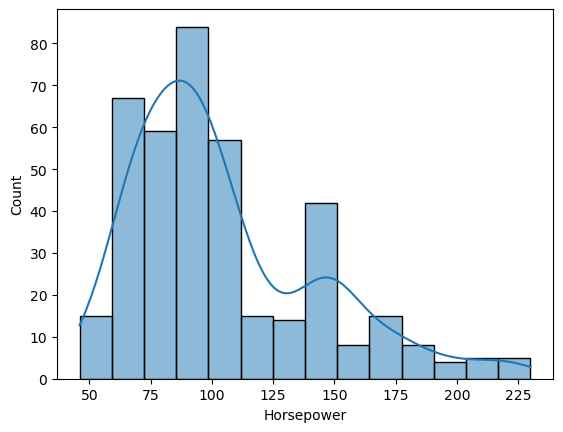

In [9]:
# Cell 3: Handling missing values
print(data.isna().sum())
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())
print(data.isna().sum())

sns.histplot(data.Horsepower, kde=True)
plt.show()


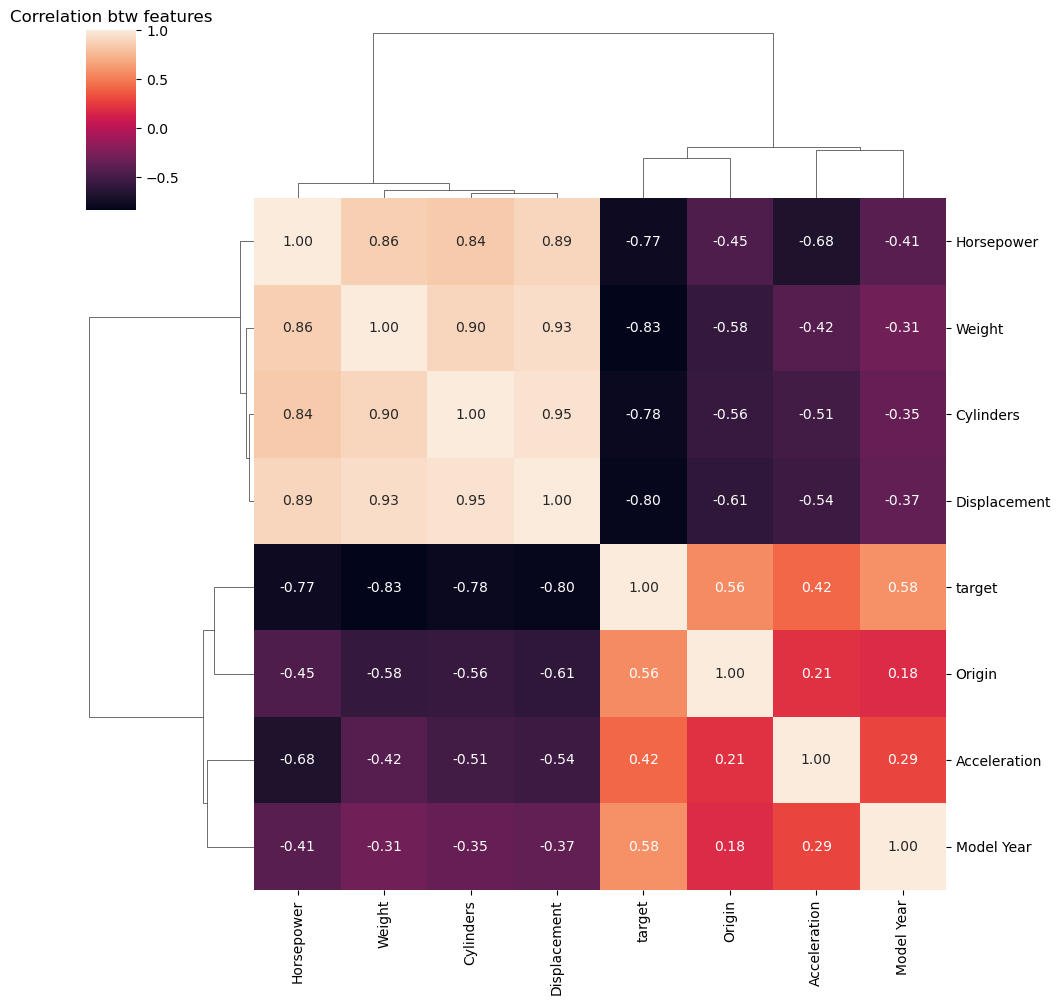

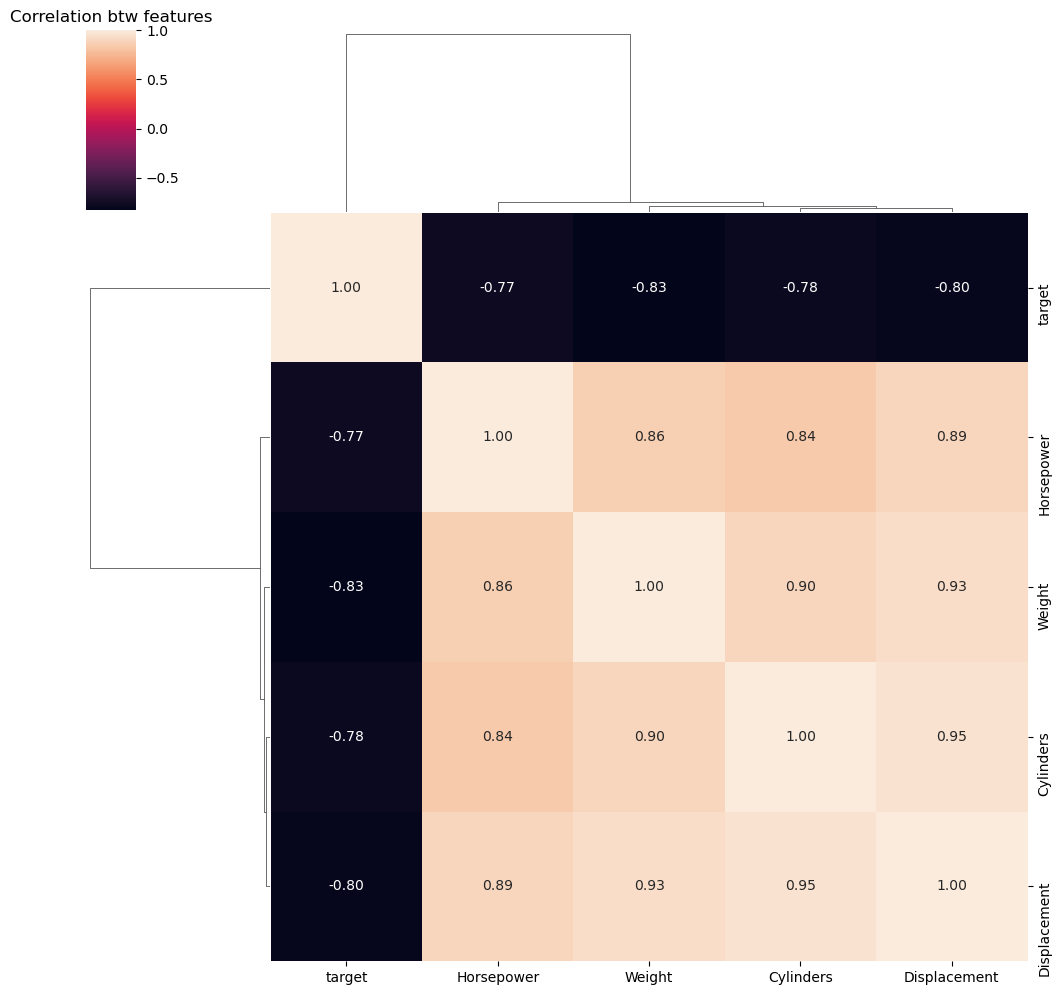

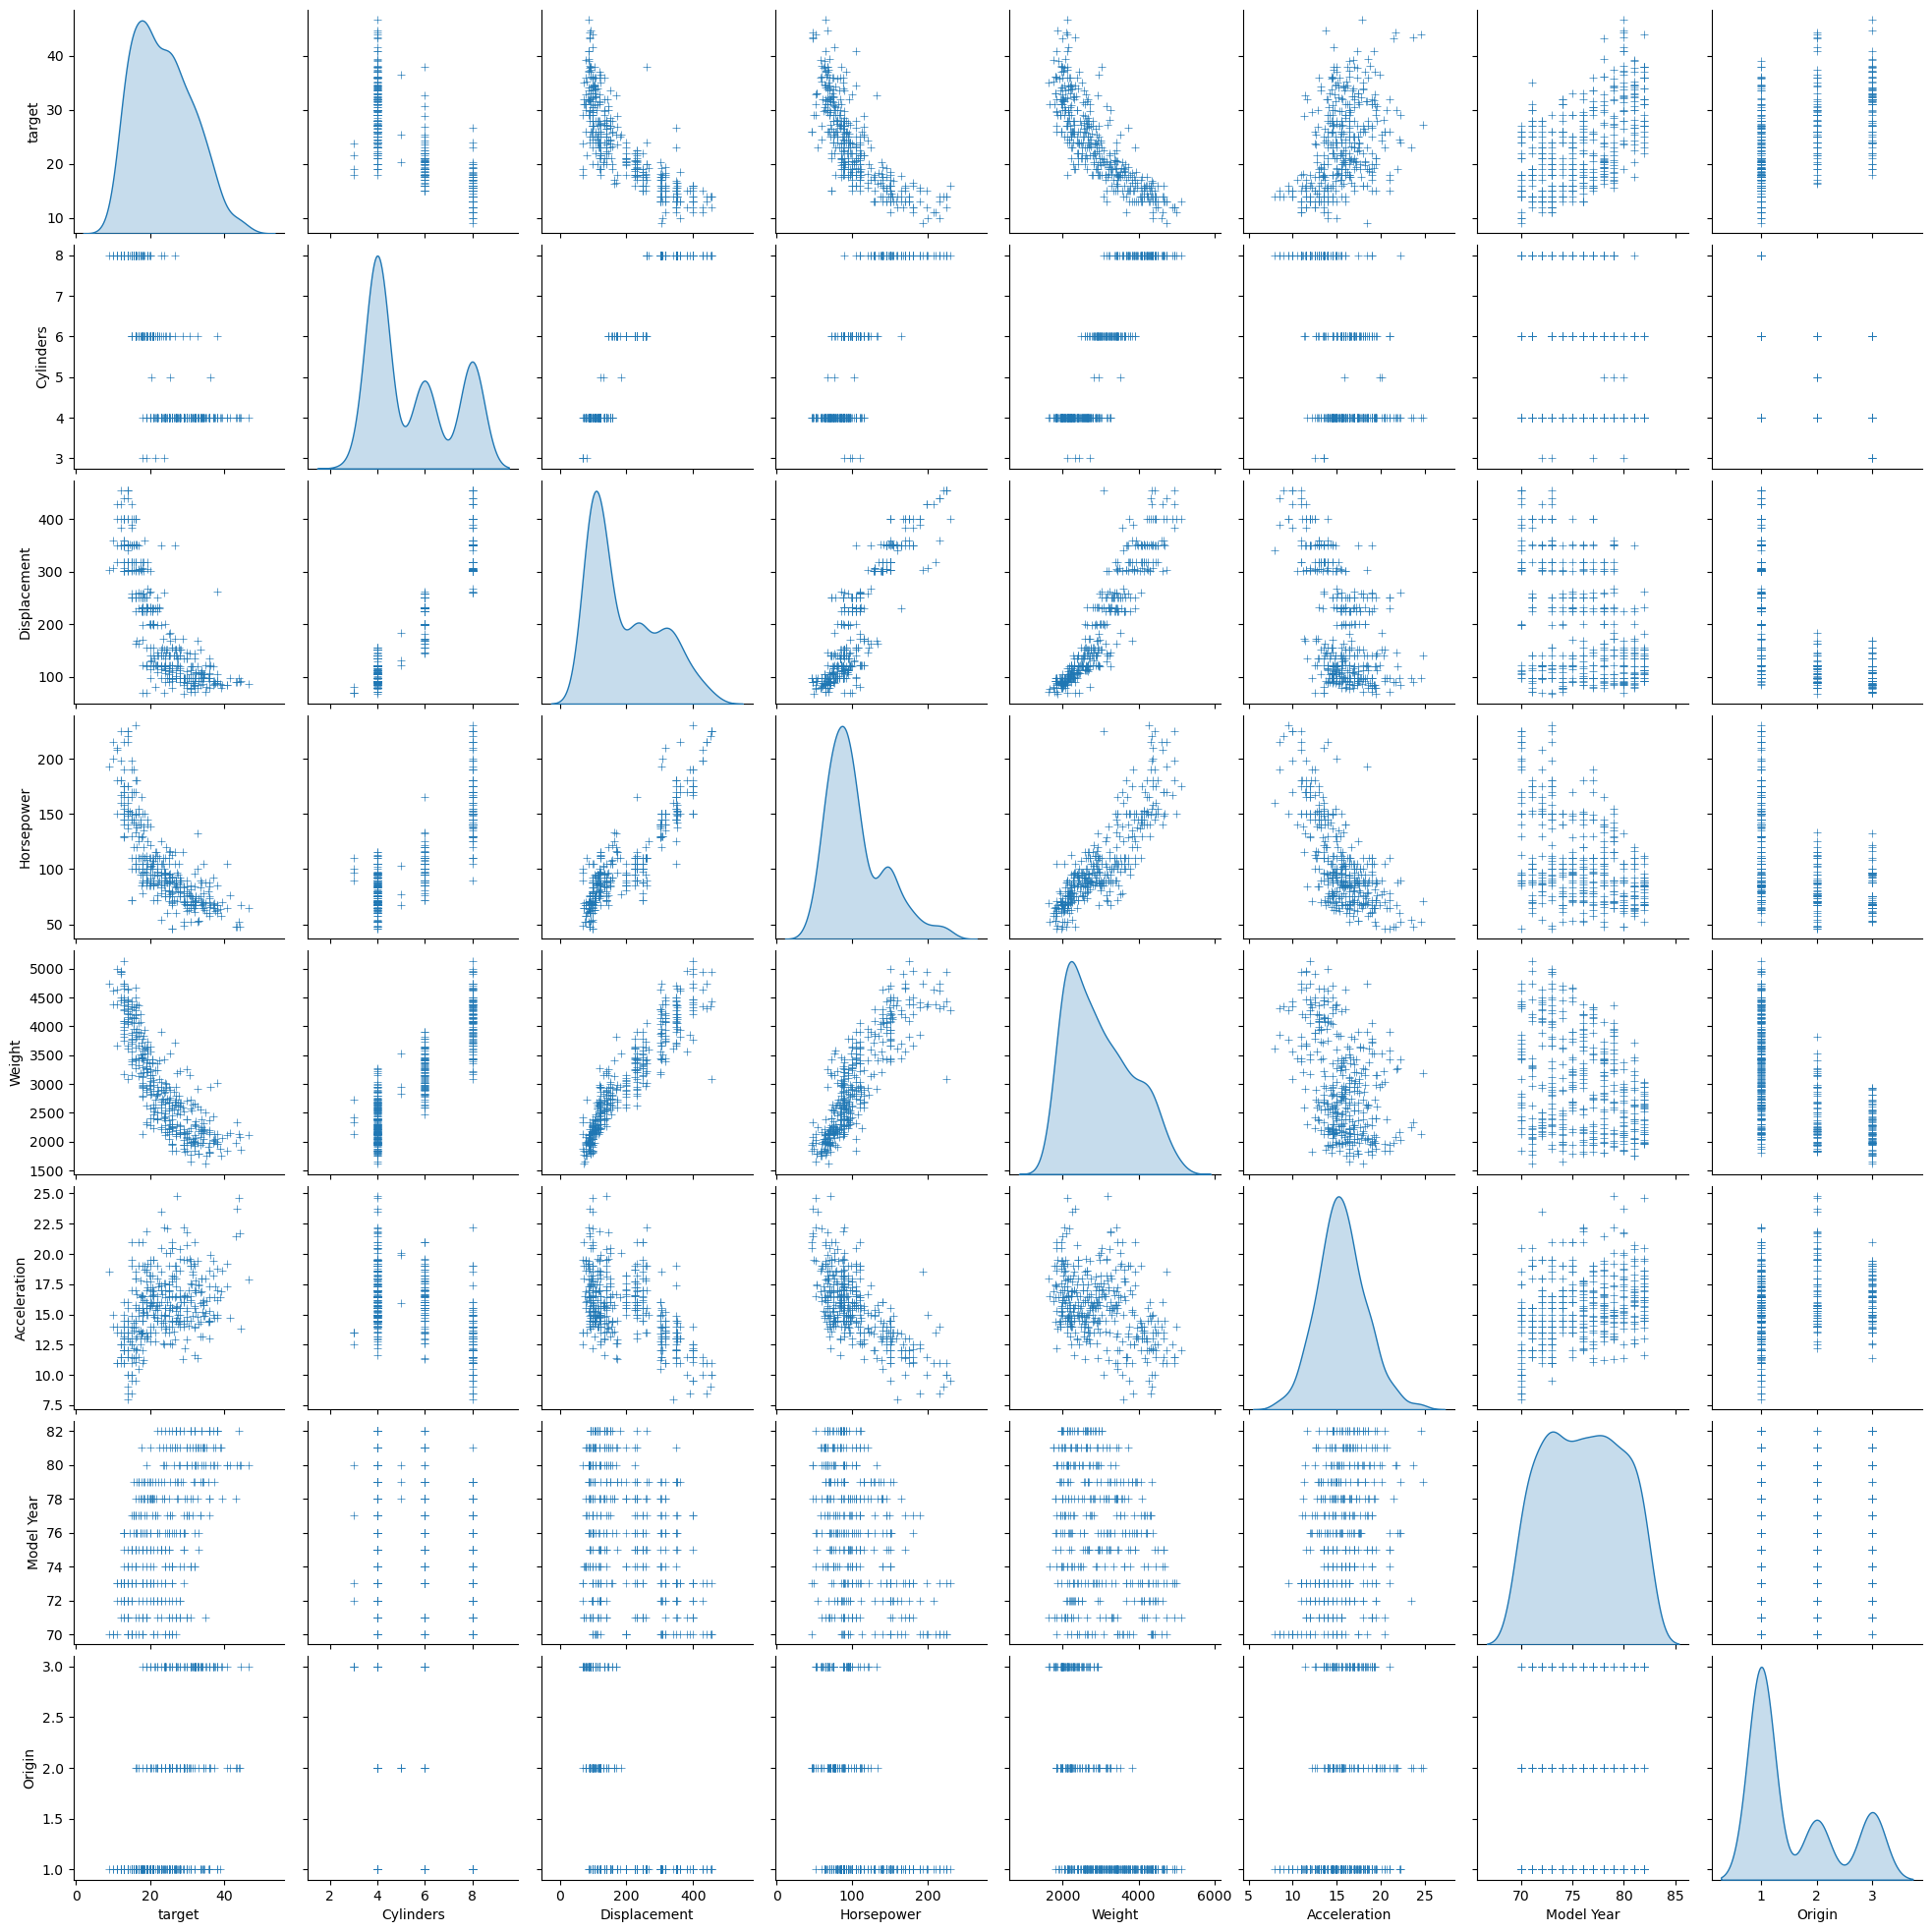

In [10]:
# Cell 4: Exploratory Data Analysis 
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

threshold = 0.75
filtre = np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

sns.pairplot(data, diag_kind = "kde", markers = "+")
plt.show()


Cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
Origin
1    249
3     79
2     70
Name: count, dtype: int64


c:\Users\Taner\anaconda3\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Taner\anaconda3\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Taner\anaconda3\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Taner\anaconda3\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Taner\anaconda3\lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Taner\anaconda3\lib\site-p

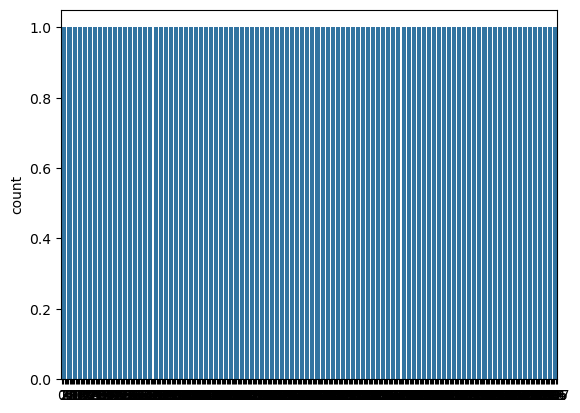

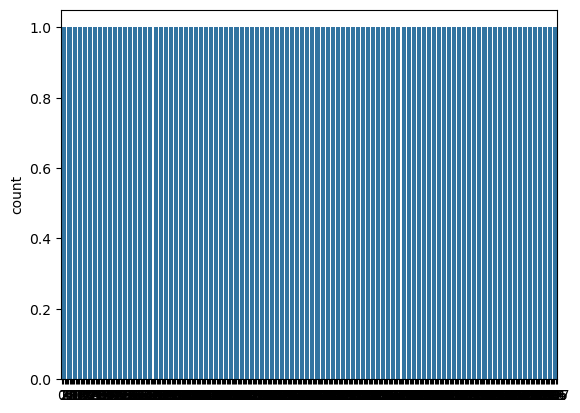

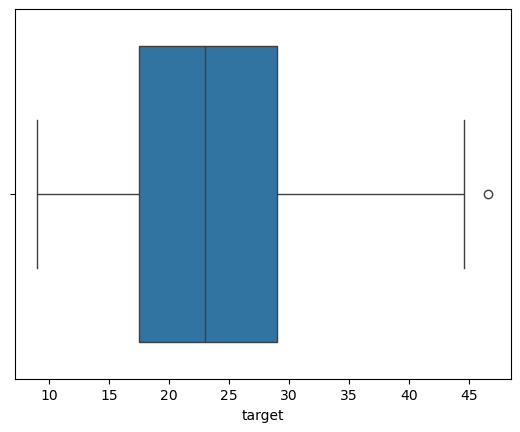

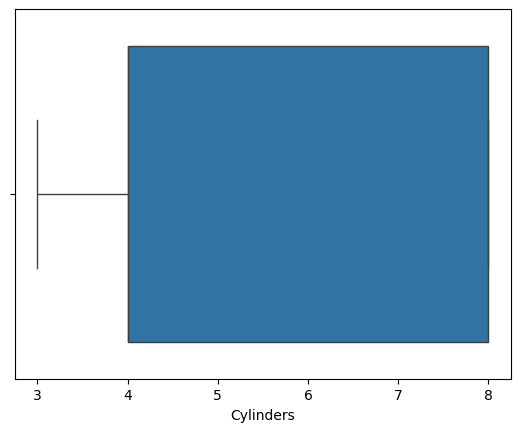

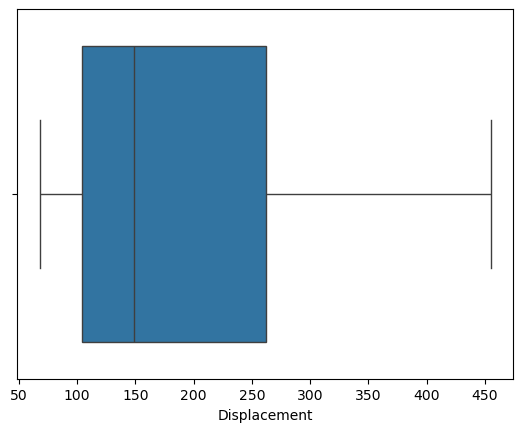

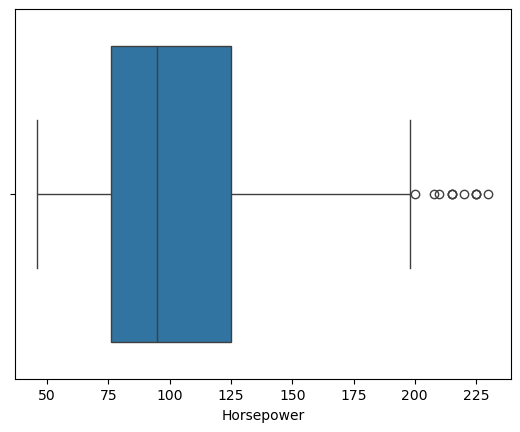

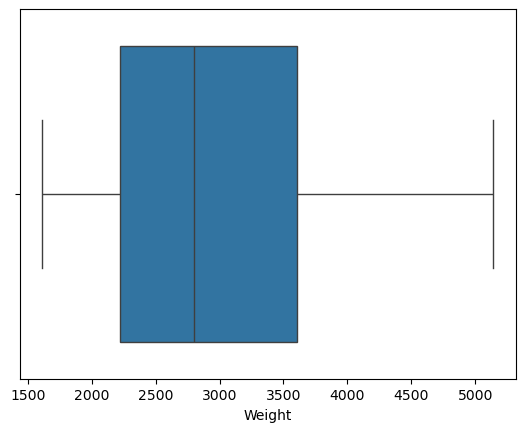

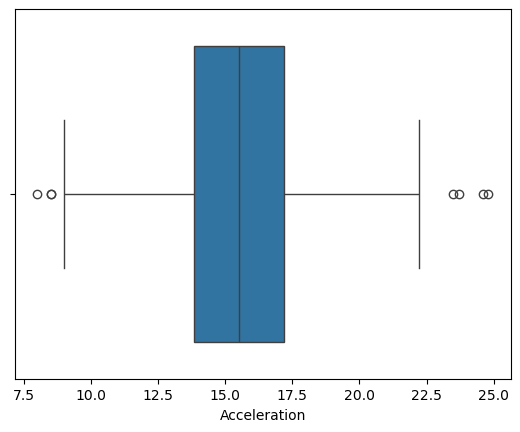

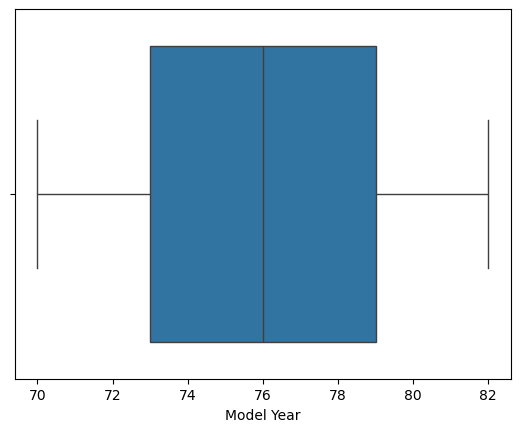

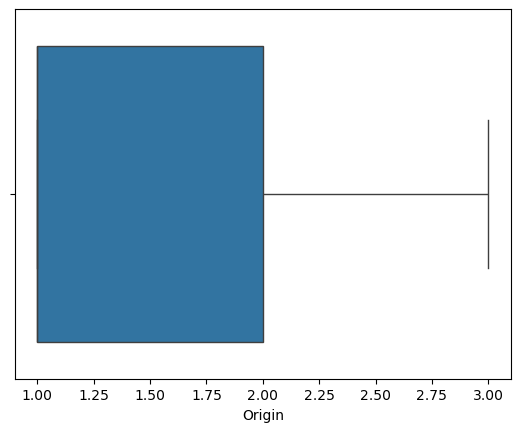

In [11]:
# Cell 5: Handle categorical features
plt.figure()
sns.countplot(data["Cylinders"])
print(data["Cylinders"].value_counts())

plt.figure()
sns.countplot(data["Origin"])
print(data["Origin"].value_counts())

for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")


In [12]:
# Cell 6: Remove outliers
thr = 2
horsepower_desc = describe["Horsepower"]
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < data["Horsepower"]
filter_hp_top = data["Horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top

data = data[filter_hp]

acceleration_desc = describe["Acceleration"]
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc - q1_acc
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc
filter_acc_bottom = bottom_limit_acc < data["Acceleration"]
filter_acc_top= data["Acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top

data = data[filter_acc] # remove Horsepower outliers


C:\Users\Taner\AppData\Local\Temp\ipykernel_8804\3451856526.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q3_hp = horsepower_desc[6]
C:\Users\Taner\AppData\Local\Temp\ipykernel_8804\3451856526.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q1_hp = horsepower_desc[4]
C:\Users\Taner\AppData\Local\Temp\ipykernel_8804\3451856526.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q3_acc = acceleration_desc[6]
C:\Users\Taner\

C:\Users\Taner\AppData\Local\Temp\ipykernel_8804\1248862257.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.target, fit = norm)


mu: 23.472405063291134, sigma = 7.756119546409932


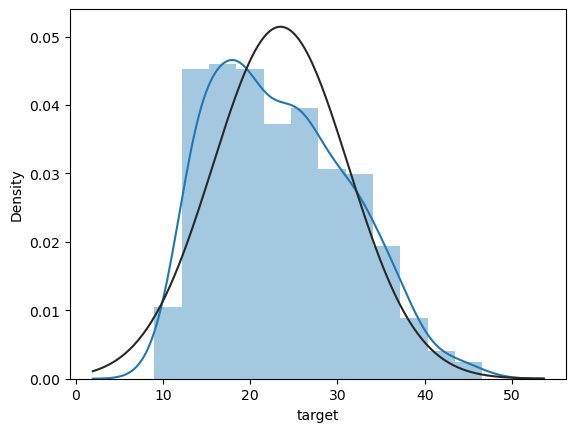

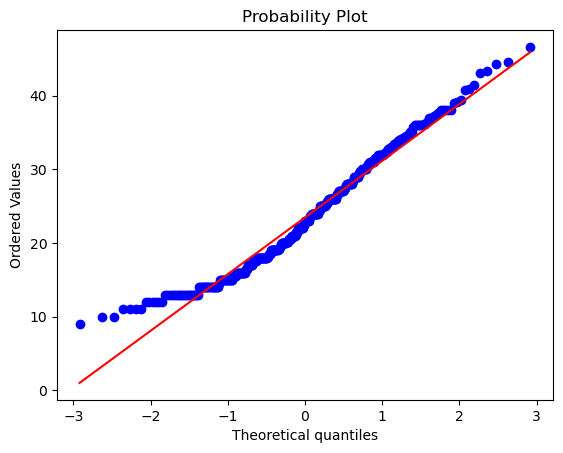

C:\Users\Taner\AppData\Local\Temp\ipykernel_8804\1248862257.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.target, fit = norm)


mu: 3.146474056830183, sigma = 0.3227569103044823


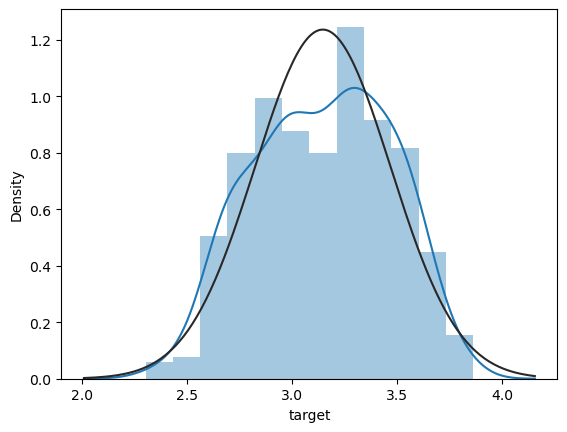

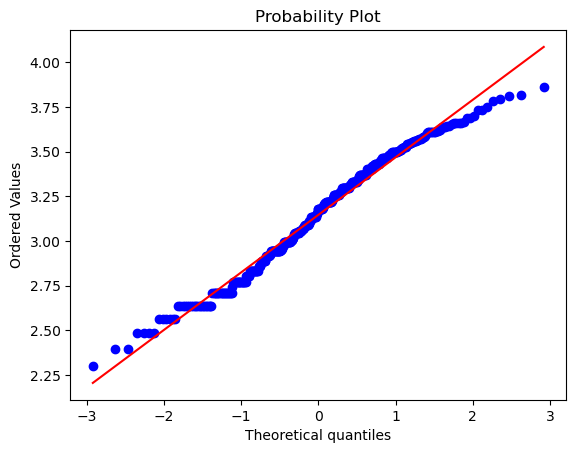

In [13]:
# Cell 7: Feature Engineering
sns.distplot(data.target, fit = norm)

(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu, sigma))

# qq plot
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()

data["target"] = np.log1p(data["target"]) 

plt.figure()
sns.distplot(data.target, fit = norm)

(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu, sigma))

# qq plot
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()

skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])


In [14]:
# Cell 8: One-hot encoding
data["Cylinders"] = data["Cylinders"].astype(str)  
data["Origin"] = data["Origin"].astype(str) 

data = pd.get_dummies(data)


In [15]:
# Cell 9: Split and standardize data
x = data.drop(["target"], axis = 1)
y = data.target

test_size = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_size, random_state = 42)

scaler = RobustScaler()  # RobustScaler #StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Cell 10: Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
print("LR Coef: ",lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Linear Regression MSE: ",mse)


LR Coef:  [-1.52652234e-01 -1.10059003e-01 -3.51567523e-02 -7.81023601e-02
  7.76057988e-02 -2.71614700e-01  1.86827885e-01  1.64798730e-17
  5.74192760e-02  2.73675388e-02 -1.43431578e-02 -6.77254422e-02
  8.20686000e-02]
Linear Regression MSE:  0.020984711065869636


Ridge Coef:  [-0.07617499 -0.10434789 -0.0756786  -0.06362033  0.08849698 -0.17538752
  0.17840625  0.          0.02717488 -0.03019362 -0.02334111 -0.05192496
  0.07526607]
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge MSE:  0.018839299330570585


Text(0.5, 1.0, 'Ridge')

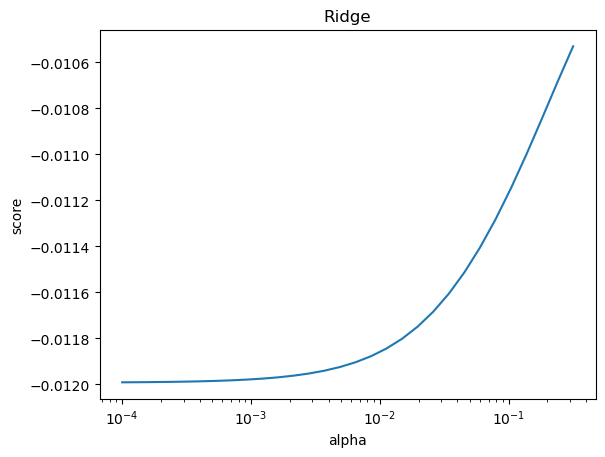

In [17]:
# Cell 11: Ridge Regression (L2)
ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4,-0.5,30)

tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Ridge Coef: ",clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge MSE: ",mse)

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")


Lasso Coef:  [-0.01692687 -0.10976505 -0.11721736 -0.03064576  0.09866154 -0.01243765
  0.16495225  0.          0.00378698 -0.00505995 -0.         -0.
  0.07376033]
Lasso Best Estimator:  Lasso(alpha=0.0037065129109221566, max_iter=10000, random_state=42)
Lasso MSE:  0.016597127172690827


Text(0.5, 1.0, 'Lasso')

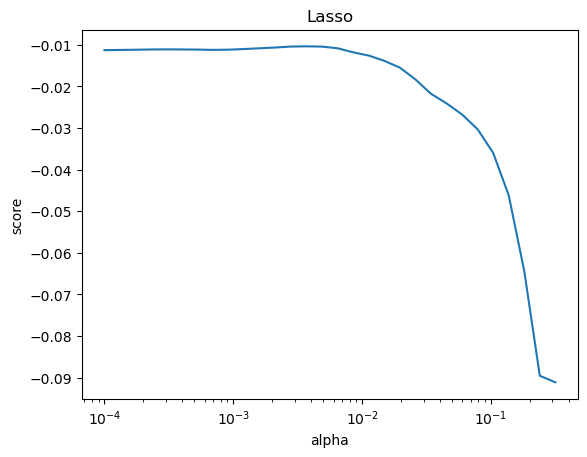

In [18]:
# Cell 12: Lasso Regression (L1)
lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,Y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print("Lasso Coef: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Lasso MSE: ",mse)

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")


In [19]:
# Cell 13: ElasticNet
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}

eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, Y_train)


print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)


c:\Users\Taner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.163e-02, tolerance: 2.644e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Taner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.778e-02, tolerance: 2.886e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

ElasticNet Coef:  [-0.0518437  -0.10923982 -0.09538543 -0.03946691  0.09541227 -0.07791667
  0.14374215  0.          0.         -0.01852327 -0.         -0.00200172
  0.0793579 ]
ElasticNet Best Estimator:  ElasticNet(alpha=0.014873521072935119, l1_ratio=0.15000000000000002,
           max_iter=10000, random_state=42)
ElasticNet MSE:  0.017234676963922276


In [27]:
# Ensure you have xgboost installed
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming other necessary imports and data preparation steps have been done

# XGBoost parameters grid
parametersGrid = {
    'nthread': [4], # when use hyperthread, xgboost may become slower
    'objective': ['reg:squarederror'],  # Corrected objective for regression
    'learning_rate': [0.03, 0.05, 0.07], 
    'max_depth': [5, 6, 7],
    'min_child_weight': [4],
    'silent': [1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'n_estimators': [500, 1000]
}

# Initialize XGBRegressor
model_xgb = xgb.XGBRegressor()

# GridSearchCV for hyperparameter tuning
clf = GridSearchCV(model_xgb, parametersGrid, cv=5, scoring='neg_mean_squared_error', refit=True, n_jobs=5, verbose=True)

# Fit the model
clf.fit(X_train, Y_train)

# Get the best estimator
model_xgb = clf.best_estimator_

# Predict
y_predicted_dummy = clf.predict(X_test)

# Calculate MSE
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("XGBoost MSE: ", mse)


AttributeError: module 'xgboost' has no attribute 'XGBRegressor'